## **Problem**

**Optimizing Storage Room Conditions: Predicting the Optimal Temperature for Long-term Storage**

###**1. Importing Libraries** 

In [ ]:
!pip install sklearn-genetic-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 5.8 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

###**2. Importing Dataset**

In [3]:
df = pd.read_csv('/content/DataSet.csv')
df.head()

Peak Hour Time Stamp  Temperature  Humidity   CO2  Max Temperature  \
0          0       5:00         55.0        93  5178               40   
1          0       6:00         45.0        90  5236               40   
2          1      22:00         45.0        90  5423               40   
3          0      14:00         50.0        95  5658               40   
4          0      15:00         60.0        95  5912               40   

   Min Temperature  External Temperature  Energy Consumption  \
0               34                  75.2                  30   
1               34                  73.0                  65   
2               34                 100.0                  75   
3               34                 110.0                  15   
4               34                 108.0                  70   

   Desired Temperature  
0                 34.0  
1                 34.0  
2                 40.0  
3                 34.0  
4                 34.0

In [ ]:
df['Time Stamp']

0        5:00
1        6:00
2       22:00
3       14:00
4       15:00
        ...  
2978     0:00
2979     1:00
2980     2:00
2981     3:00
2982     4:00
Name: Time Stamp, Length: 2983, dtype: object

In [4]:
# Convert the time stamp column to a datetime object
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'], format='%H:%M')

In [5]:
df['Time Stamp'] = df['Time Stamp'].dt.hour

In [ ]:
df['Time Stamp']

0        5
1        6
2       22
3       14
4       15
        ..
2978     0
2979     1
2980     2
2981     3
2982     4
Name: Time Stamp, Length: 2983, dtype: int64

### **3. Descriptive analysis** 

In [ ]:
df.shape

(2983, 10)

In [ ]:
df.columns

Index(['Peak Hour', 'Time Stamp', 'Temperature', 'Humidity', 'CO2',
       'Max Temperature', 'Min Temperature', 'External Temperature',
       'Energy Consumption', 'Desired Temperature'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Peak Hour               0
Time Stamp              0
Temperature             0
Humidity                0
CO2                     0
Max Temperature         0
Min Temperature         0
External Temperature    0
Energy Consumption      0
Desired Temperature     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Peak Hour             2983 non-null   int64  
 1   Time Stamp            2983 non-null   int64  
 2   Temperature           2983 non-null   float64
 3   Humidity              2983 non-null   int64  
 4   CO2                   2983 non-null   int64  
 5   Max Temperature       2983 non-null   int64  
 6   Min Temperature       2983 non-null   int64  
 7   External Temperature  2983 non-null   float64
 8   Energy Consumption    2983 non-null   int64  
 9   Desired Temperature   2983 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 233.2 KB


In [ ]:
df.describe()

Peak Hour   Time Stamp  Temperature     Humidity          CO2  \
count  2983.000000  2983.000000  2983.000000  2983.000000  2983.000000   
mean      0.208180    11.508213    54.141167    90.494133  7282.919209   
std       0.406074     6.902540    17.984177     2.770306  1346.817013   
min       0.000000     0.000000    34.000000    85.000000  5001.000000   
25%       0.000000     6.000000    38.400000    89.000000  6127.000000   
50%       0.000000    12.000000    48.600000    91.000000  7215.000000   
75%       0.000000    17.000000    69.000000    92.000000  8249.000000   
max       1.000000    23.000000    94.300000    95.000000  9993.000000   

       Max Temperature  Min Temperature  External Temperature  \
count      2983.000000      2983.000000           2983.000000   
mean         41.582300        35.272544             87.027724   
std           2.325863         1.245976             14.795121   
min          40.000000        34.000000             45.000000   
25%          40.000000        34.000000             78.800000   
50%          40.000000        35.000000             88.000000   
75%          45.000000        37.000000             98.600000   
max          45.000000        37.000000            114.100000   

       Energy Consumption  Desired Temperature  
count         2983.000000          2983.000000  
mean            45.919209            36.823701  
std             26.407702             2.765607  
min              6.000000            34.000000  
25%             13.000000            35.000000  
50%             61.000000            36.000000  
75%             69.000000            38.700000  
max             75.000000            45.000000

In [ ]:
df.nunique()

Peak Hour                  2
Time Stamp                24
Temperature              597
Humidity                  11
CO2                     1758
Max Temperature            2
Min Temperature            3
External Temperature     128
Energy Consumption        46
Desired Temperature      105
dtype: int64

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('\n')

Peak Hour
[0 1]


Time Stamp
[ 5  6 22 14 15  8  9 18 19 16 10 11 12 13 17 20 21 23  0  1  2  3  4  7]


Temperature
[55.  45.  50.  60.  53.  57.  61.  52.  39.  40.  38.  55.8 55.2 54.9
 54.8 54.7 54.6 54.5 54.2 54.  53.7 53.5 53.3 52.7 52.4 51.7 51.3 51.1
 51.  50.8 51.2 51.4 51.6 51.8 51.9 51.5 50.7 50.3 49.7 49.5 49.3 49.1
 49.  48.6 48.7 48.9 48.8 48.4 48.3 48.  47.8 47.6 47.4 47.1 46.7 46.4
 46.2 45.9 45.5 45.3 44.9 44.7 44.6 44.5 44.3 44.2 44.1 44.  43.9 43.7
 43.5 43.3 43.1 42.8 42.6 42.3 42.1 41.8 41.5 41.2 40.8 40.4 40.2 39.8
 39.6 39.4 39.2 38.8 38.7 38.6 38.3 38.1 37.9 37.6 37.3 37.  36.8 36.5
 36.1 35.8 35.5 35.2 35.  34.8 34.7 34.5 34.3 34.2 34.1 34.  86.  85.3
 84.5 83.8 83.1 82.4 81.7 81.  80.3 79.5 78.9 78.2 78.3 77.  76.4 75.7
 75.  74.4 73.8 73.1 72.4 71.7 71.  70.3 69.5 69.  68.5 68.  67.3 66.6
 66.  65.4 64.7 64.8 64.2 63.7 63.  62.4 61.7 60.5 59.3 58.6 58.  57.5
 56.4 54.4 52.5 50.4 49.6 47.  46.5 46.  45.4 42.5 42.  40.9 39.5 37.4
 36.  35.4 35.1 35.3 35.6 35.7 

### **4. Visualization for data analysis**

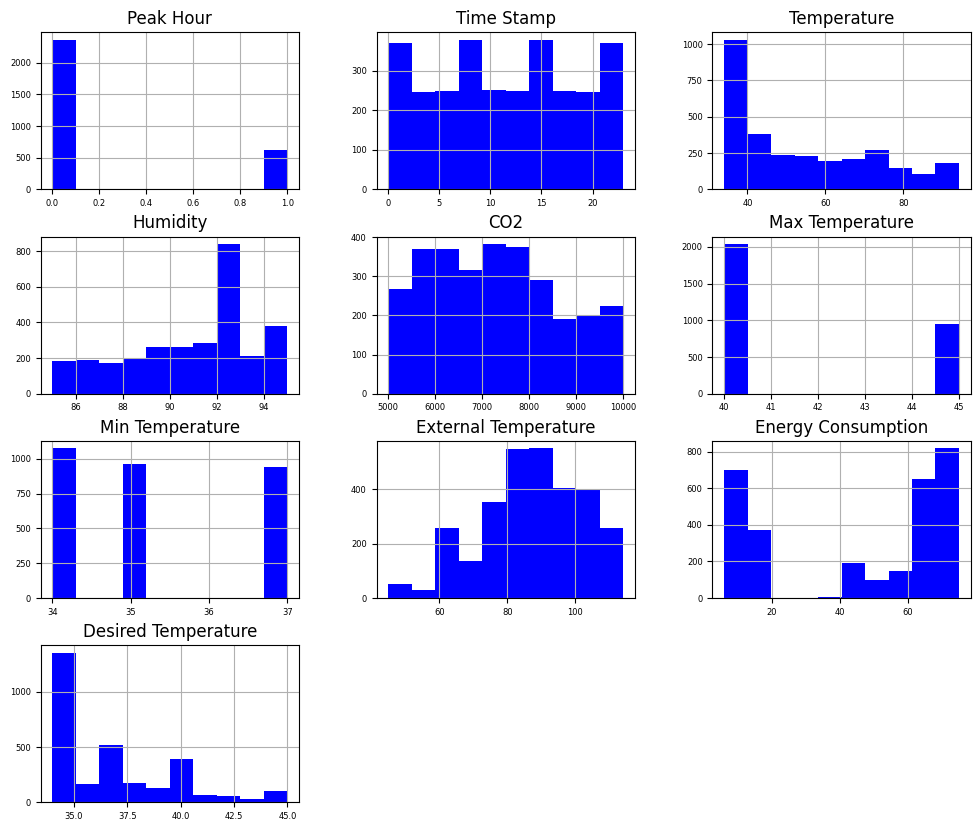

In [ ]:
df.hist(figsize=(12, 10), xlabelsize=6, ylabelsize=6, color = "blue")
plt.show()

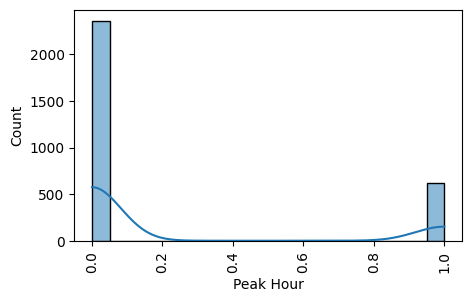

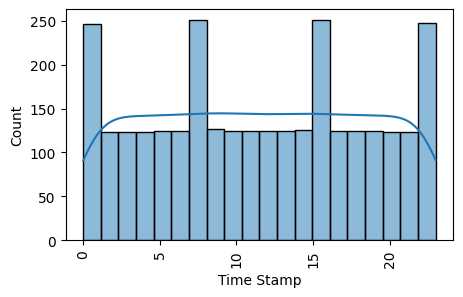

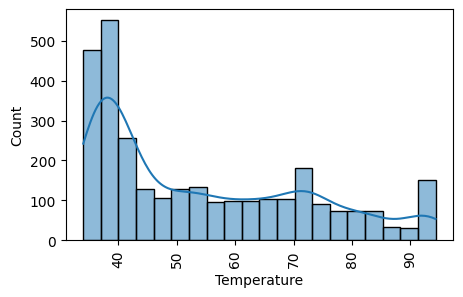

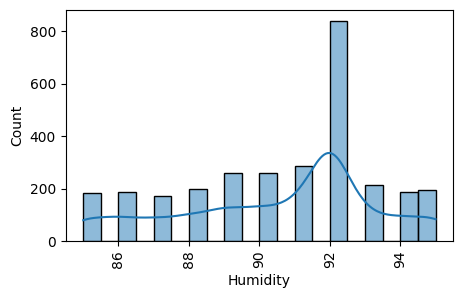

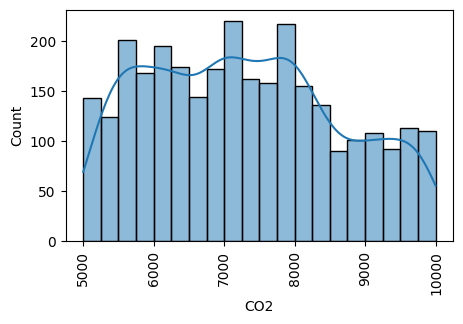

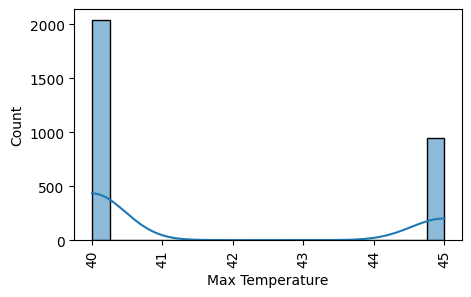

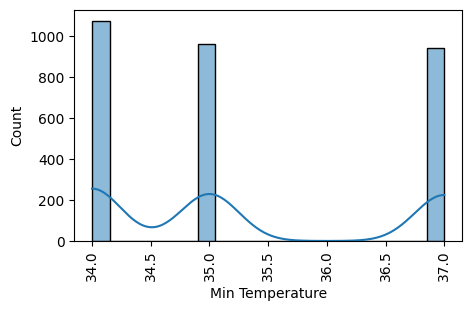

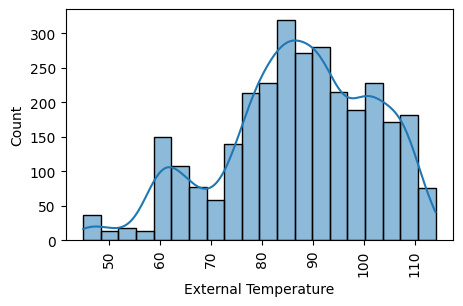

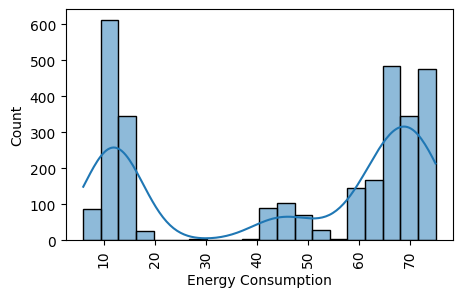

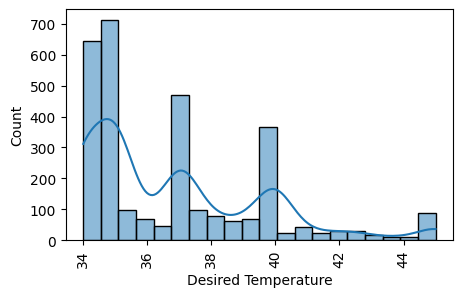

In [ ]:
for i in df.columns:
  plt.figure(figsize=(5,3))
  sns.histplot(df[i],kde=True,bins=20,palette='hls')
  plt.xticks(rotation=90)
  plt.show()

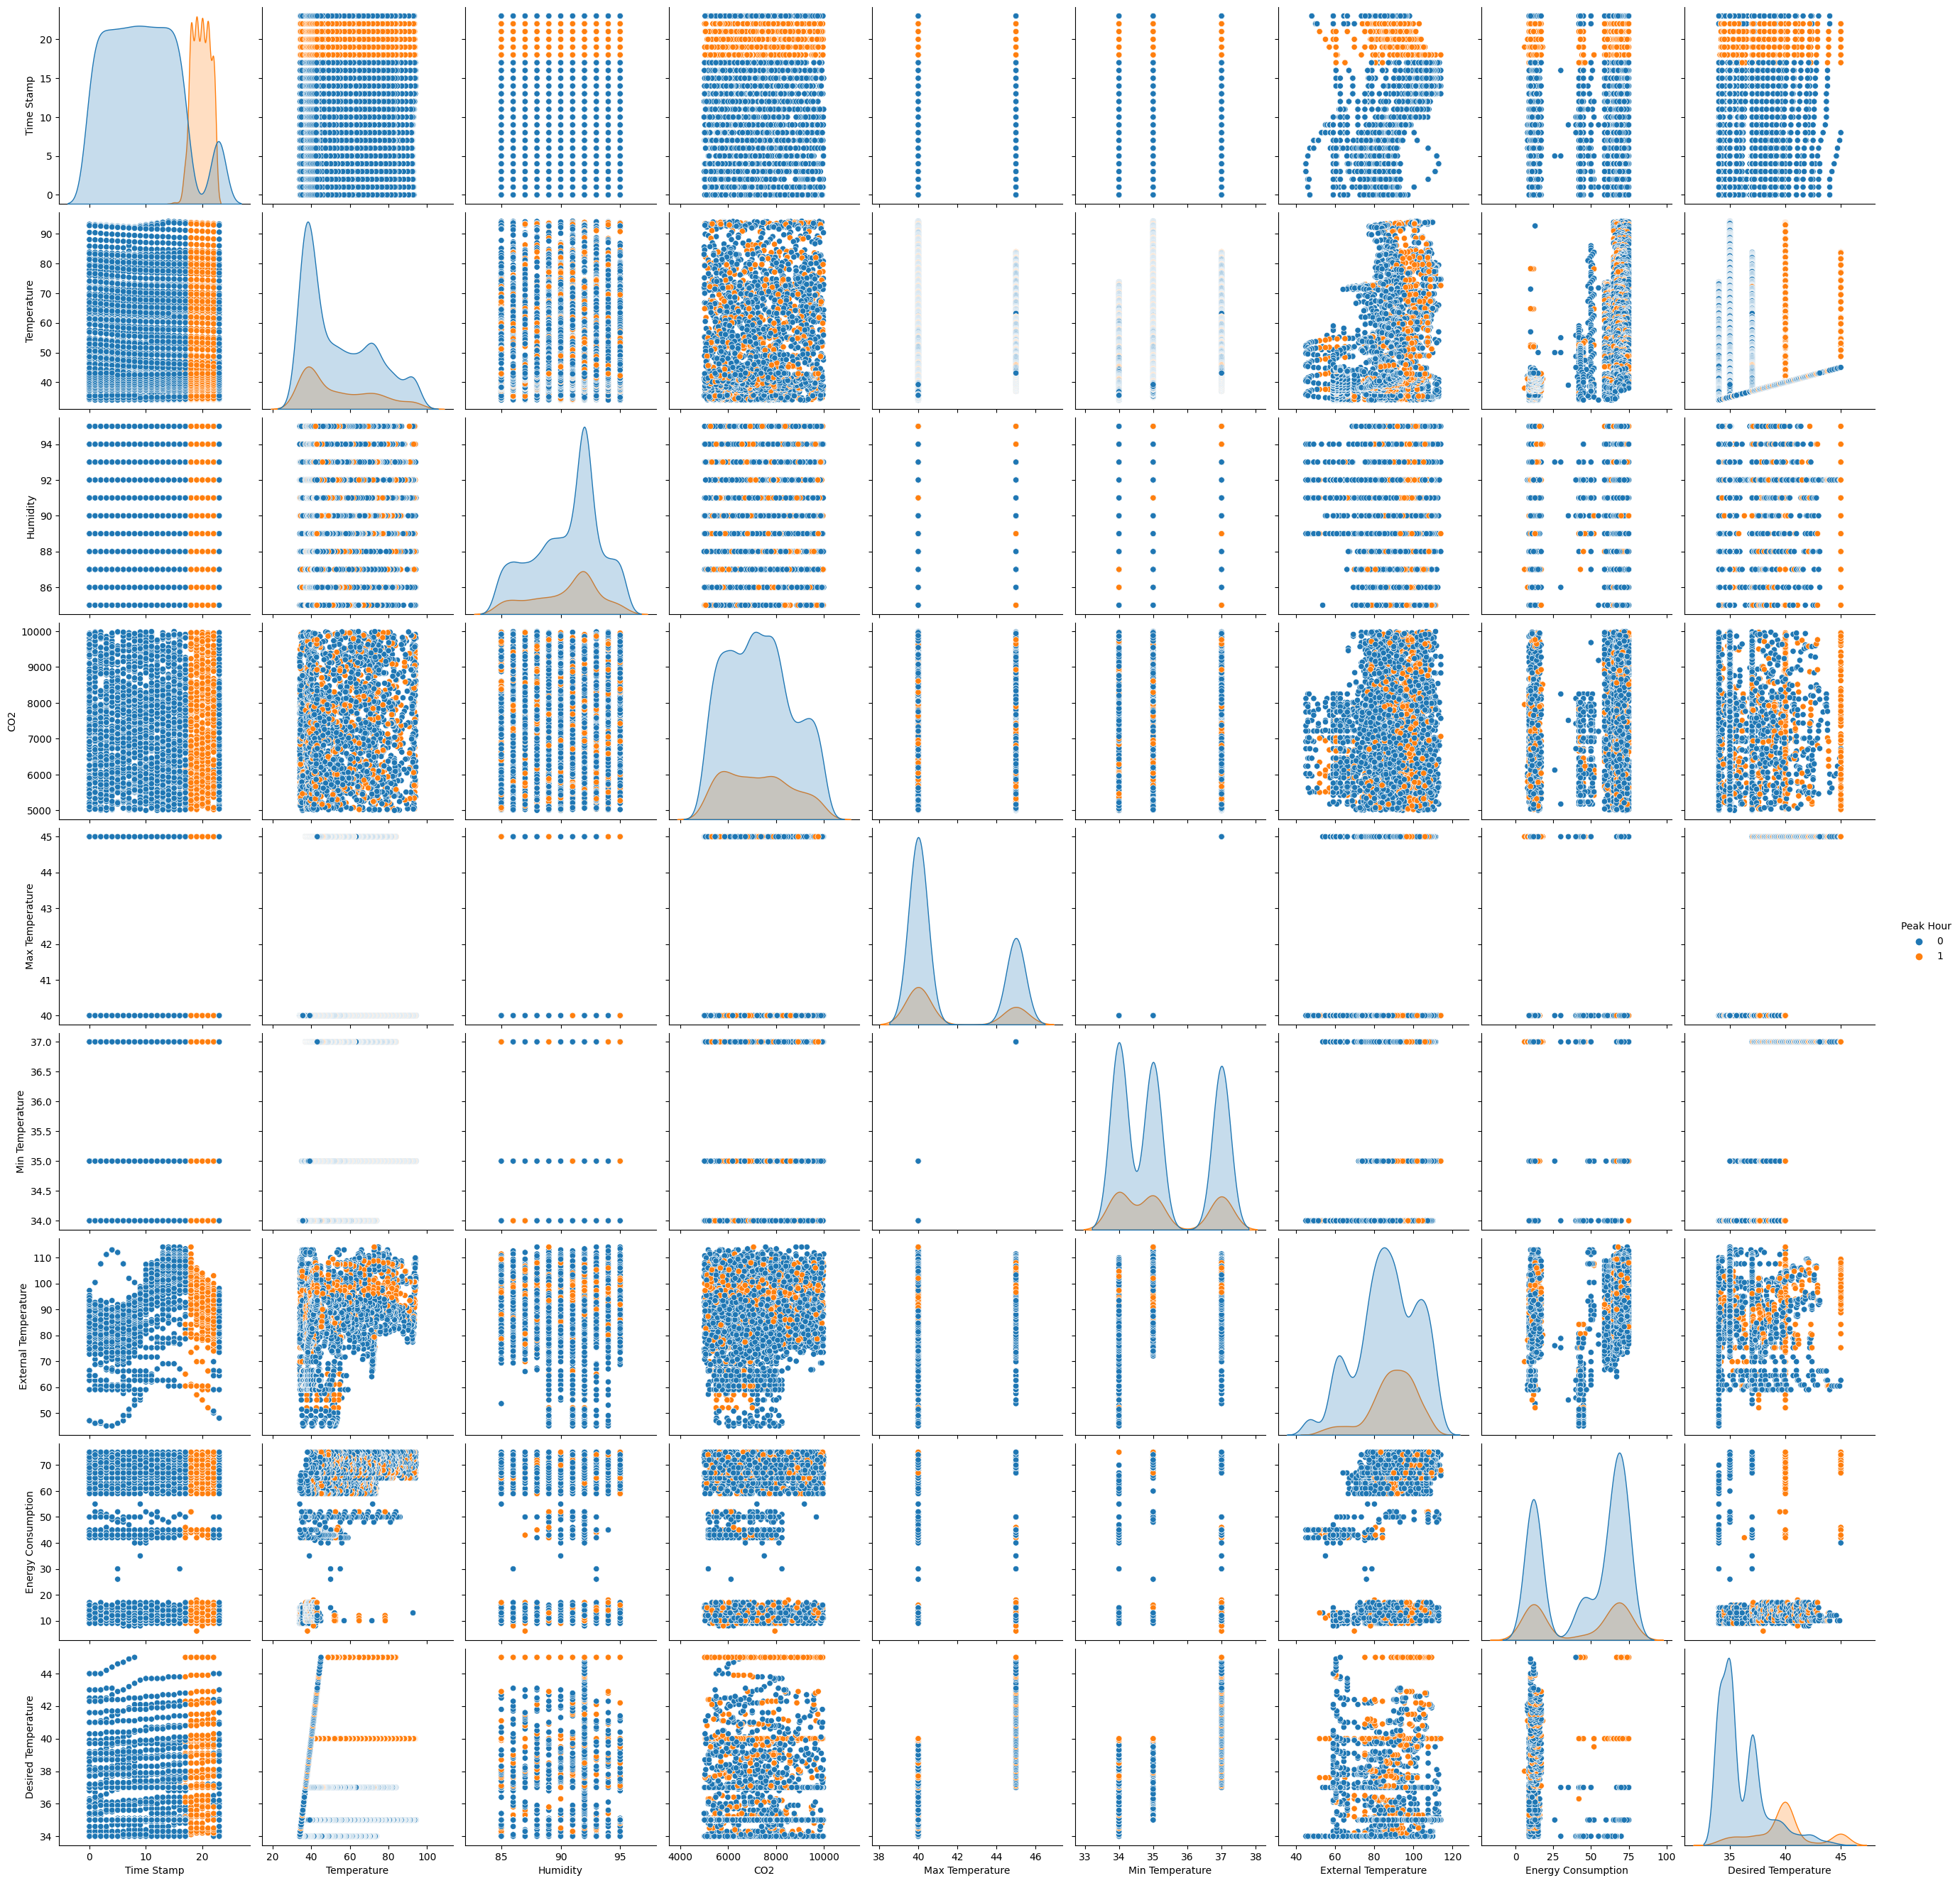

In [ ]:
sns.pairplot(df,hue="Peak Hour",height=3)
plt.show()

### **5. Feature selection and engineering**

In [ ]:
correlation = df.corr()
correlation

Peak Hour  Time Stamp  Temperature  Humidity       CO2  \
Peak Hour              1.000000    0.614521     0.001076 -0.022315 -0.010968   
Time Stamp             0.614521    1.000000     0.010606  0.006417 -0.026194   
Temperature            0.001076    0.010606     1.000000 -0.108176  0.128610   
Humidity              -0.022315    0.006417    -0.108176  1.000000 -0.066543   
CO2                   -0.010968   -0.026194     0.128610 -0.066543  1.000000   
Max Temperature        0.002625    0.000339    -0.115465 -0.012611 -0.023768   
Min Temperature        0.003148    0.000617     0.029439 -0.018627 -0.007533   
External Temperature   0.080672    0.286276     0.322897 -0.123505  0.115412   
Energy Consumption    -0.064415   -0.049282     0.711941 -0.150777  0.164749   
Desired Temperature    0.547397    0.341050    -0.065183 -0.006992 -0.021151   

                      Max Temperature  Min Temperature  External Temperature  \
Peak Hour                    0.002625         0.003148              0.080672   
Time Stamp                   0.000339         0.000617              0.286276   
Temperature                 -0.115465         0.029439              0.322897   
Humidity                    -0.012611        -0.018627             -0.123505   
CO2                         -0.023768        -0.007533              0.115412   
Max Temperature              1.000000         0.943512              0.009503   
Min Temperature              0.943512         1.000000              0.136858   
External Temperature         0.009503         0.136858              1.000000   
Energy Consumption          -0.133267        -0.020856              0.338383   
Desired Temperature          0.558723         0.559405              0.073972   

                      Energy Consumption  Desired Temperature  
Peak Hour                      -0.064415             0.547397  
Time Stamp                     -0.049282             0.341050  
Temperature                     0.711941            -0.065183  
Humidity                       -0.150777            -0.006992  
CO2                             0.164749            -0.021151  
Max Temperature                -0.133267             0.558723  
Min Temperature                -0.020856             0.559405  
External Temperature            0.338383             0.073972  
Energy Consumption              1.000000            -0.212868  
Desired Temperature            -0.212868             1.000000

<Axes: >

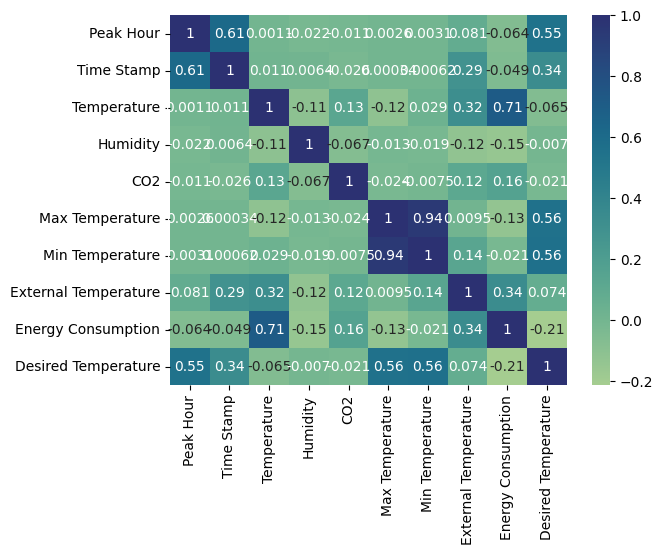

In [ ]:
sns.heatmap(correlation,annot=True,cmap='crest')

In [6]:
X = df[['Peak Hour','Time Stamp','Temperature','Humidity','CO2','Max Temperature','Min Temperature','External Temperature','Energy Consumption']]

In [7]:
y = df['Desired Temperature']

In [ ]:
X.head()

Peak Hour  Time Stamp  Temperature  Humidity   CO2  Max Temperature  \
0          0           5         55.0        93  5178               40   
1          0           6         45.0        90  5236               40   
2          1          22         45.0        90  5423               40   
3          0          14         50.0        95  5658               40   
4          0          15         60.0        95  5912               40   

   Min Temperature  External Temperature  Energy Consumption  
0               34                  75.2                  30  
1               34                  73.0                  65  
2               34                 100.0                  75  
3               34                 110.0                  15  
4               34                 108.0                  70

In [ ]:
y.head()

0    34.0
1    34.0
2    40.0
3    34.0
4    34.0
Name: Desired Temperature, dtype: float64

In [ ]:
X.shape

(2983, 9)

In [ ]:
y.shape

(2983,)

### **5.1 Data Split**

In [8]:
from sklearn.model_selection import train_test_split
X_Train, X_Test,y_Train,y_Test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **5.2 Feature Importance**

**1**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_Train, y_Train)

RandomForestRegressor(random_state=0)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_Train.columns).sort_values(ascending=False)

feature_scores

Peak Hour               0.303903
Temperature             0.268274
Min Temperature         0.190553
Max Temperature         0.127204
Energy Consumption      0.100669
CO2                     0.004185
External Temperature    0.002756
Time Stamp              0.002170
Humidity                0.000286
dtype: float64

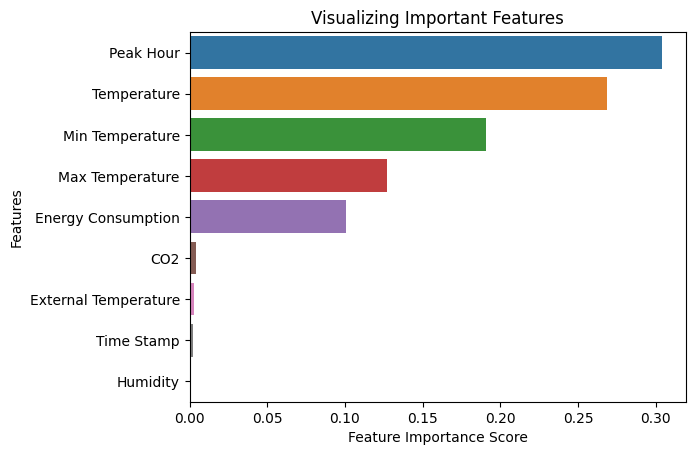

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

**2**

In [ ]:
import xgboost as xgb

# create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_Train, label=y_Train)

# set parameters for XGBoost
params = {
    'max_depth': 3,
    'eta': 0.01,
    'objective': 'reg:squarederror'
}

# train XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# get feature importance
importances = model.get_score(importance_type='gain')


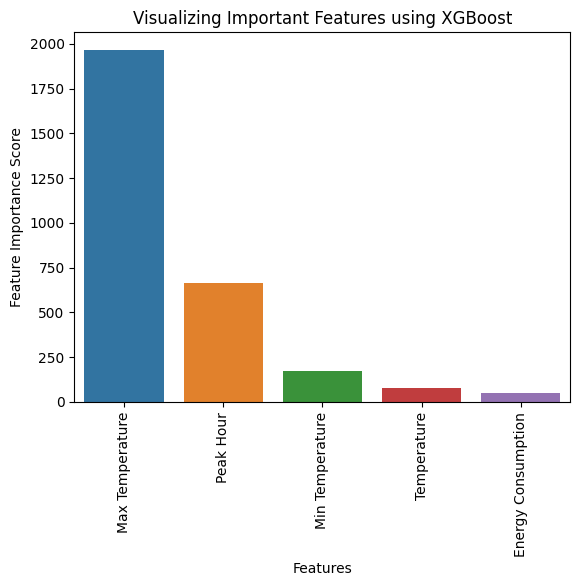

In [ ]:
# convert importances to a dataframe
feature_scores1 = pd.DataFrame(importances, index=['Importance']).T

# sort the dataframe by feature importance
feature_scores1 = feature_scores1.sort_values('Importance', ascending=False)

# create bar plot of feature importances
sns.barplot(x=feature_scores1.index, y=feature_scores1.Importance)

# add labels to the graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features using XGBoost")

# rotate x-axis labels to avoid overlap
plt.xticks(rotation=90)

# visualize the graph
plt.show()

**3**

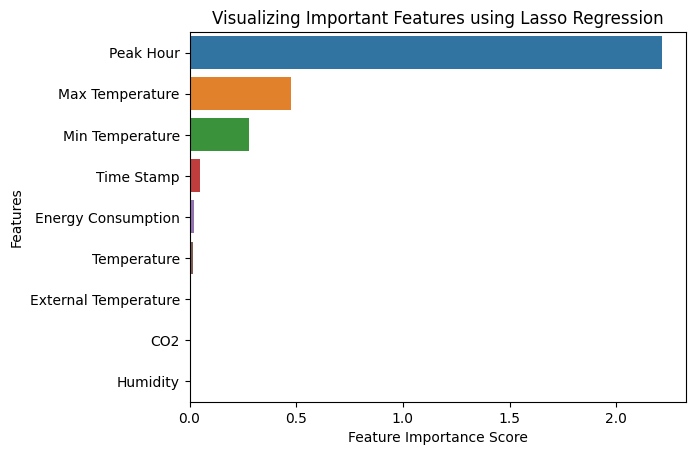

In [ ]:
from sklearn.linear_model import Lasso

# train Lasso model
lasso = Lasso(alpha=0.15)
lasso.fit(X_Train, y_Train)

# get feature importance
importances = abs(lasso.coef_)

# create dataframe of feature importances
feature_scores2 = pd.DataFrame({'Feature': X_Train.columns, 'Importance': importances})

# sort dataframe by feature importance
feature_scores2 = feature_scores2.sort_values('Importance', ascending=False)

# create bar plot of feature importances
sns.barplot(x='Importance', y='Feature', data=feature_scores2)

# add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features using Lasso Regression")

# visualize the graph
plt.show()


### **6. Parmeters Optimization**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer

In [ ]:
# declare parameters
params = {
     'max_depth': [3,4,5,6,8,10,12,15],
     'learning_rate': [0.1,.2,.25,.3],
     'n_estimators': [10,25,50,100],
     'gamma': [0.0,0.1,0.2,0.3,0.4] 
                      }    


    # 'n_estimators':[500],
    # 'min_child_weight':[4,5], 
    # 'gamma':[i/10.0 for i in range(3,6)],  
    # 'subsample':[i/10.0 for i in range(6,11)],
    # 'colsample_bytree':[i/10.0 for i in range(6,11)], 
    # 'max_depth': [2,3,4,6,7],
    # 'objective': ['reg:squarederror', 'reg:tweedie'],
    # 'booster': ['gbtree', 'gblinear'],
    # 'eval_metric': ['rmse'],
    # 'eta': [i/10.0 for i in range(3,6)],

In [ ]:
# declare parameters
params_ranges = {
    'max_depth': Integer(2, 30),
    # 'max_depth': [3,4,5,6,8,10,12,15],
    'learning_rate': Continuous(0.01, .4),
    'n_estimators': Integer(10, 150),
    'gamma': Continuous(0, 0.4)
                      }   

In [ ]:
regressor= xgboost.XGBRegressor()

**1**

In [ ]:
# Define the GeneticAlgorithmSearchCV object
gas = GASearchCV(estimator= regressor, 
                               param_grid=params_ranges, 
                               scoring='accuracy', 
                               cv=3,
                               population_size=10,
                               verbose=True, 
                               generations=5)


In [ ]:
# Fit the GeneticAlgorithmSearchCV object to the training data
gas.fit(X, y, callbacks=None)

gen	nevals	fitness	fitness_std	fitness_max	fitness_min
0  	10    	nan    	nan        	nan        	nan        
1  	20    	nan    	nan        	nan        	nan        
2  	20    	nan    	nan        	nan        	nan        
3  	20    	nan    	nan        	nan        	nan        
4  	20    	nan    	nan        	nan        	nan        
5  	20    	nan    	nan        	nan        	nan        


GASearchCV(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                                  colsample_bylevel=None, colsample_bynode=None,
                                  colsample_bytree=None,
                                  early_stopping_rounds=None,
                                  enable_categorical=False, eval_metric=None,
                                  feature_types=None, gamma=0.2740058921781347,
                                  gpu_id=None, grow_policy=None,
                                  importance_type=None,
                                  interaction_constraints=None,
                                  learning_rate...
           param_grid={'gamma': <sklearn_genetic.space.space.Continuous object at 0x7f53e912a8e0>,
                       'learning_rate': <sklearn_genetic.space.space.Continuous object at 0x7f53e912a880>,
                       'max_depth': <sklearn_genetic.space.space.Integer object at 0x7f53e912aeb0>,
                       'n_estimators': <sklearn_genetic.space.space.Integer object at 0x7f53e912a760>},
           population_size=10, return_train_score=True, scoring='accuracy')

In [ ]:
# Print the best hyperparameters and the corresponding ROC-AUC score
print("Best hyperparameters:", gas.best_params_)
print("Best ROC-AUC score:", gas.best_score_)

Best hyperparameters: {'max_depth': 25, 'learning_rate': 0.15494590704676714, 'n_estimators': 24, 'gamma': 0.2740058921781347}
Best ROC-AUC score: nan


### **2**

In [ ]:
# Instantiate GridSearchCV object with the regressor and parameter grid
grid_search = GridSearchCV(regressor, params,scoring='roc_auc',n_jobs=-1,cv=3,verbose=3)

In [ ]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X,y)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None,
                                    gamma=0.2740058921781347, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learni...
                                    max_depth=25, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=24,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.1, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='roc_auc', verbose=3)

In [ ]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
grid_search.best_params_

{'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}

### **3**

In [ ]:
ran_search = RandomizedSearchCV(regressor,param_distributions=params,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
ran_search.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.2, 0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'n_estimators': [10, 25, 50, 100]},
                   scoring='roc_auc', verbose=3)

In [ ]:
ran_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
ran_search.best_params_

{'n_estimators': 10, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.2}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# instantiate the classifier 
xgb_clf = GradientBoostingRegressor(n_estimators=10, learning_rate=0.2 ,max_depth=5).fit(X_Train,y_Train)

### **7. Predition**

In [ ]:
xgb_clf.score(X_Test,y_Test)

0.9727154219914081

In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb_clf, X, y, cv= 10)

In [ ]:
score

array([0.90203205, 0.86268949, 0.6513711 , 0.98201115, 0.94680865,
       0.98143406, 0.98661037, 0.98393125, 0.86209289, 0.67362384])

In [ ]:
score.mean()

0.8832604842101015

### **8. Evaluation Metrics** 

**R squared & MSE**

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = xgb_clf.predict(X_Test)

In [ ]:
# y_test is the true target values of the test data
# y_pred is the predicted target values of the test data
r2 = r2_score(y_Test, y_pred)
rmse = mean_squared_error(y_Test, y_pred, squared=True)


In [ ]:
print("R2 score:", r2)
print("RMSE:", rmse)

R2 score: 0.9954860861216588
MSE: 0.03387598410519691


In [ ]:
import joblib

joblib.dump(xgb_clf, 'xgb_model.joblib')

['xgb_model.joblib']

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

In [19]:
rf_model.fit(X_Train, y_Train)

RandomForestRegressor(max_depth=5, random_state=42)

In [20]:
rf_model.score(X_Test,y_Test)

0.9825819377896973

In [23]:
score1 = cross_val_score(rf_model, X, y, cv= 10)
score1.mean()

0.921117216426399

In [27]:
# y_test is the true target values of the test data
# y_pred is the predicted target values of the test data
y_pred = rf_model.predict(X_Test)
r2 = r2_score(y_Test, y_pred)
rmse = mean_squared_error(y_Test, y_pred, squared=True)
print("R2 score:", r2)
print("RMSE:", rmse)

R2 score: 0.9825819377896973
RMSE: 0.1310106912296274


In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=9, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with a custom learning rate
opt = Adam(learning_rate=0.02)
model.compile(loss='mean_squared_error', optimizer=opt)

# Train the model
history = model.fit(X_Train, y_Train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Print the training and testing accuracy and loss at each epoch
for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch+1}: Training Loss = {history.history['loss'][epoch]:.4f}, Validation Loss = {history.history['val_loss'][epoch]:.4f}")

# Evaluate the model
scores = model.evaluate(X_Test, y_Test)
print("RMSE: %.2f" % (np.sqrt(scores)))

# Make predictions
predictions = model.predict(X)

Epoch 1: Training Loss = 20970.3457, Validation Loss = 118.0920
Epoch 2: Training Loss = 62.6598, Validation Loss = 47.1128
Epoch 3: Training Loss = 44.3007, Validation Loss = 95.9657
Epoch 4: Training Loss = 36.9647, Validation Loss = 34.7501
Epoch 5: Training Loss = 42.5307, Validation Loss = 30.5992
Epoch 6: Training Loss = 23.4204, Validation Loss = 20.8209
Epoch 7: Training Loss = 40.1243, Validation Loss = 125.4603
Epoch 8: Training Loss = 41.3338, Validation Loss = 10.3724
Epoch 9: Training Loss = 38.3935, Validation Loss = 126.5425
Epoch 10: Training Loss = 21.8765, Validation Loss = 10.6285
Epoch 11: Training Loss = 26.8441, Validation Loss = 29.2081
Epoch 12: Training Loss = 27.2973, Validation Loss = 7.2490
Epoch 13: Training Loss = 20.4654, Validation Loss = 24.3950
Epoch 14: Training Loss = 200.0111, Validation Loss = 26.8333
Epoch 15: Training Loss = 68.4195, Validation Loss = 137.6452
Epoch 16: Training Loss = 58.8025, Validation Loss = 6.7751
Epoch 17: Training Loss = 1

In [ ]:
predictions

array([[36.705013],
       [35.07858 ],
       [38.420452],
       ...,
       [39.818127],
       [39.18568 ],
       [39.146954]], dtype=float32)

.........................................**fin.**.................................


